In [1]:
import numpy as np
import os
import torchfile
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open('./New_York_z19.txt') as f:
    filenames = f.readlines()
filenames = [f[:-1] for f in filenames]
filenames[:10]

['New_York_40.5301893_-74.2177334_z19.png',
 'New_York_40.5301893_-74.2184199_z19.png',
 'New_York_40.5301893_-74.2191064_z19.png',
 'New_York_40.5301893_-74.2197929_z19.png',
 'New_York_40.5301893_-74.2204794_z19.png',
 'New_York_40.5301893_-74.2211659_z19.png',
 'New_York_40.5301893_-74.2218524_z19.png',
 'New_York_40.5301893_-74.2225389_z19.png',
 'New_York_40.5301893_-74.2232254_z19.png',
 'New_York_40.5301893_-74.2239119_z19.png']

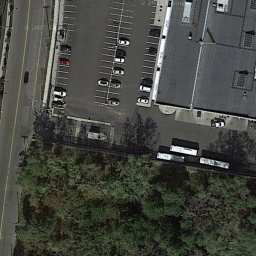

In [4]:
images_path = '/media/terrapattern/TERRAPATTERN_NEW_DATA/cities_level_19/New_York_z19/'
def showimg(imgpath):
    return Image(images_path + imgpath)
showimg(filenames[30])

In [5]:
features = torchfile.load('New_York_z19_features.t7')
knn = NearestNeighbors(algorithm='ball_tree').fit(features)

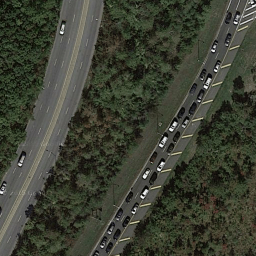

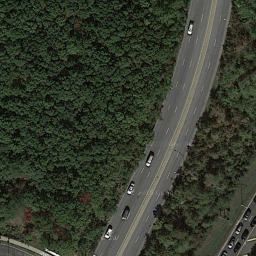

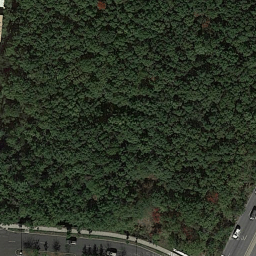

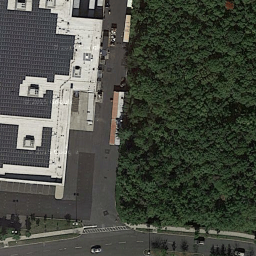

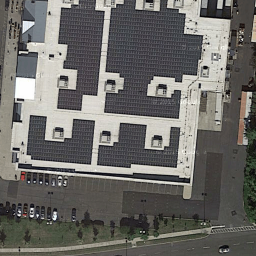

In [6]:
from IPython.display import display
def show_n(imgpaths):
    return display(*[showimg(imgpath) for imgpath in imgpaths])
show_n(filenames[10:15])

In [7]:
tile_dict = {filename : i for i, filename in enumerate(filenames)}
def show_similar(filename, n=3):
    feature = features[tile_dict[filename]]
    dists, idxs = knn.kneighbors([feature], n)
    similars = [filenames[i] for i in idxs[0]]
    return show_n(similars)

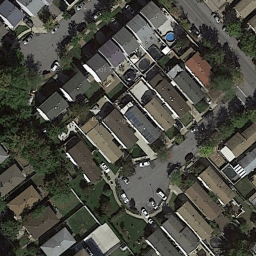

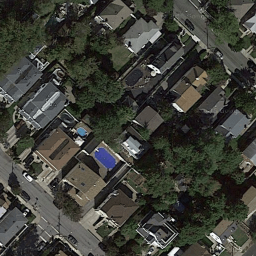

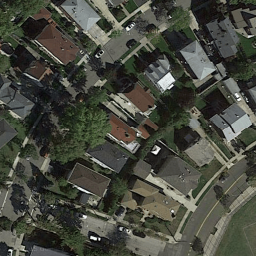

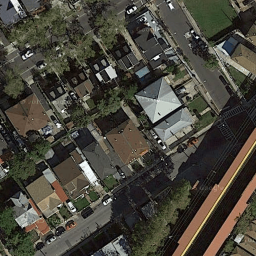

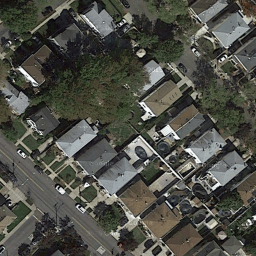

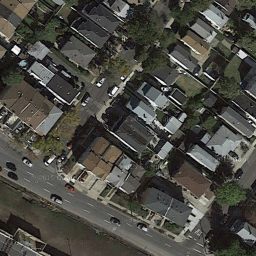

In [55]:
show_similar('New_York_40.5631068_-73.9225384_z19.png', 6)

In [37]:
import time
res = []
n = 5
for _ in xrange(100):
    rand_features = [random.choice(features) for _ in range(g)]
    m = time.time()
    _ = knn.kneighbors(rand_features, 100)
    res.append(time.time() - m)

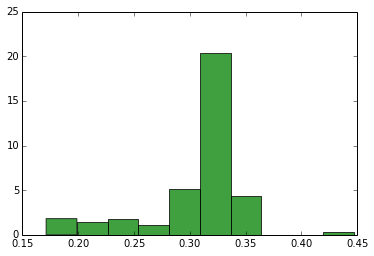

In [51]:
_ = plt.hist(res, 10, normed=1, facecolor='green', alpha=0.75)